<a href="https://colab.research.google.com/github/VINAY-GOPAL/Netflix---Data-Exploration-and-Visualisation/blob/main/NTFX_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Netflix - Data Exploration and Visualisation**



**About NETFLIX**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business Problem**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

**Dataset**

Show_id: Unique ID for every Movie / Tv Show

Type: Identifier - A Movie or TV Show

Title: Title of the Movie / Tv Show

Director: Director of the Movie

Cast: Actors involved in the movie/show

Country: Country where the movie/show was produced

Date_added: Date it was added on Netflix

Release_year: Actual Release year of the movie/show

Rating: TV Rating of the movie/show

Duration: Total Duration - in minutes or number of seasons

Listed_in: Genre

Description: The summary description

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
netflix_df = pd.read_csv("netflix1.csv")


In [ ]:
#First 5 rows of the data

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Observations** 

In [ ]:
#Shape of the data

netflix_df.shape

(8807, 12)

In [ ]:
#Information of netflix data

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We have 12 columns in the netflix data. Except release_year all cloumns are of type object(i.e categorical data). There are null values in few columns like director,cast,country,date_added,rating,duration.

There are nested values in few columns like director, cast and listed_in. We need to unnest them.

In [ ]:
#How many null values are there in each column in the given data?

netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


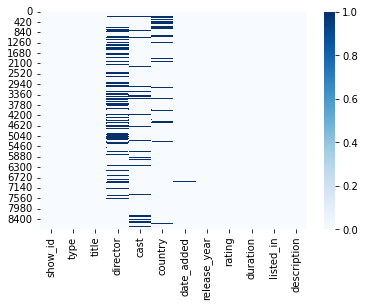

In [ ]:
#Heat map of null values

sns.heatmap(netflix_df.isnull(),cmap="Blues")
plt.show()

**Non-Graphical Analysis**

In [ ]:
netflix_df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
netflix_df["director"].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [ ]:
netflix_df["cast"].value_counts()

David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

In [ ]:
netflix_df["country"].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [ ]:
netflix_df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
netflix_df["listed_in"].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

**Preprocessing**

In [ ]:
#unnesting the cast cloumn

netflix_df["cast"] = netflix_df["cast"].str.split(",")
netflix_df = netflix_df.explode("cast").reset_index(drop=True)


In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
netflix_df.shape

(64951, 12)

In [ ]:
netflix_df["director"] = netflix_df["director"].str.split(",")
netflix_df = netflix_df.explode("director").reset_index(drop=True)

In [ ]:
netflix_df.shape

(70812, 12)

In [ ]:
netflix_df["listed_in"] = netflix_df["listed_in"].str.split(",")
netflix_df = netflix_df.explode("listed_in").reset_index(drop=True)

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
netflix_df["country"] = netflix_df["country"].str.split(",")
netflix_df = netflix_df.explode("country").reset_index(drop=True)

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
netflix_df.shape

(202065, 12)

We can observe that after unnesting the columns, the rows has increased than the rows in the given data.

In [ ]:
#How many null values are there in each column after unnesting the columns?

null_val = netflix_df.isnull().sum().reset_index()
null_val

,index,0
0,show_id,0
1,type,0
2,title,0
3,director,50643
4,cast,2149
5,country,11897
6,date_added,158
7,release_year,0
8,rating,67
9,duration,3


In [ ]:
netflix_df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,False,False,False,False,False,False,False,False,False,False,False,False
202061,False,False,False,False,False,False,False,False,False,False,False,False
202062,False,False,False,False,False,False,False,False,False,False,False,False
202063,False,False,False,False,False,False,False,False,False,False,False,False


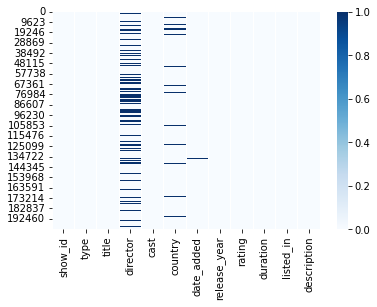

In [ ]:
#Heat map of null values after preporcessing

sns.heatmap(netflix_df.isnull(),cmap="Blues")
plt.show()

**Visual Analysis**

i. **Univariate analysis**

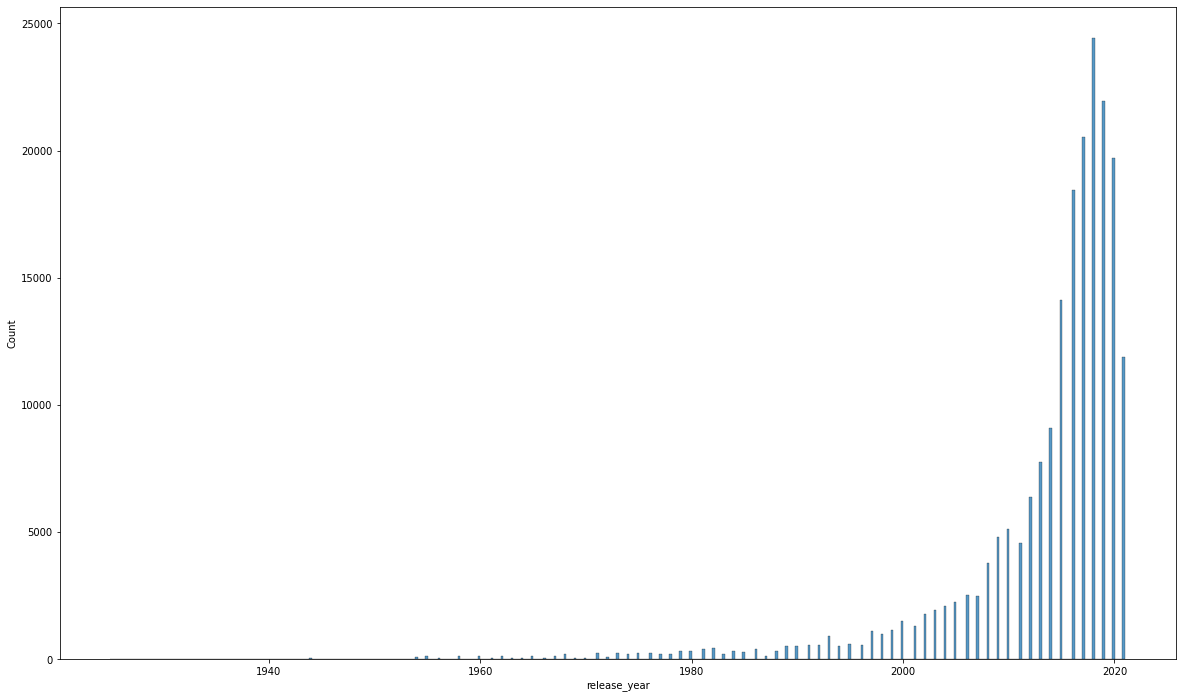

In [ ]:
#Histogram for release_year

plt.figure(figsize=(20,12))
sns.histplot(netflix_df["release_year"])
plt.show()

Here we can observe that from the year 1960 number of movies and tv shows produced has increased exponentially. From year 2012 number of movies and tv shows produced has increased every year. One of the reasons is maybe availability of internet and smart phones.

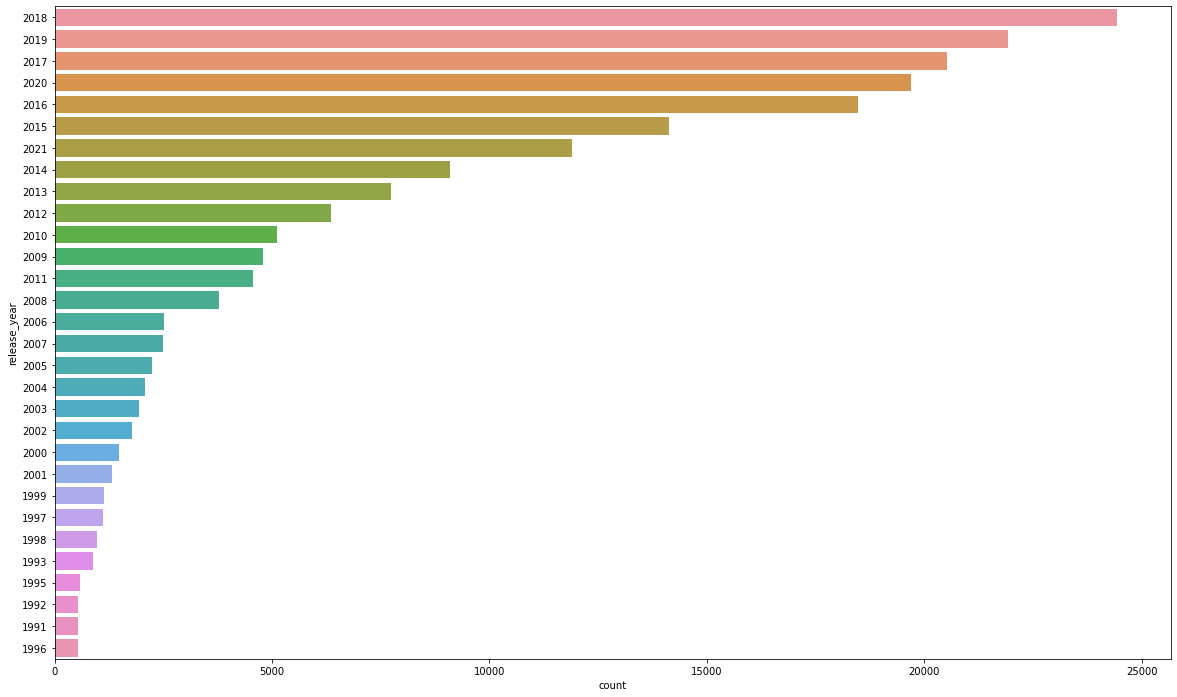

In [ ]:
#countplot for release_year

plt.figure(figsize=(20,12))
ax = sns.countplot(y="release_year", data=netflix_df,  order=netflix_df['release_year'].value_counts().index[0:30])

This graph shows that the majority of the content was created in 2018. The amount of produced contents is minimal in 2019, 2020, and 2021, which is an interesting fact. This is primarily because to the Covid-19 epidemic.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


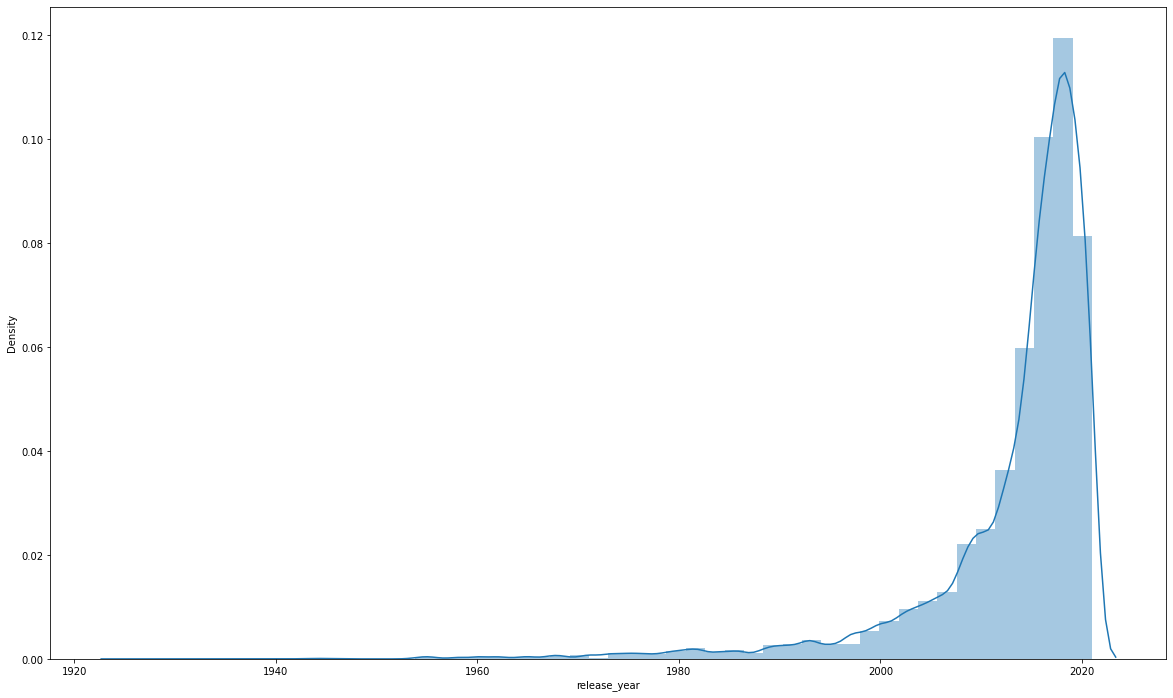

In [ ]:
#Distplot for release_year

plt.figure(figsize=(20,12))
sns.distplot(netflix_df["release_year"])
plt.show()

This graph shows the maximum distribution of data is after year 2000.

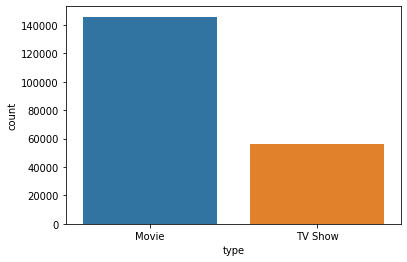

In [ ]:
#countplot for type

sns.countplot(x="type", data=netflix_df)

This plot shows the count of movies and tv shows after treating the null values. Number of movies produced are more compared to tv shows.

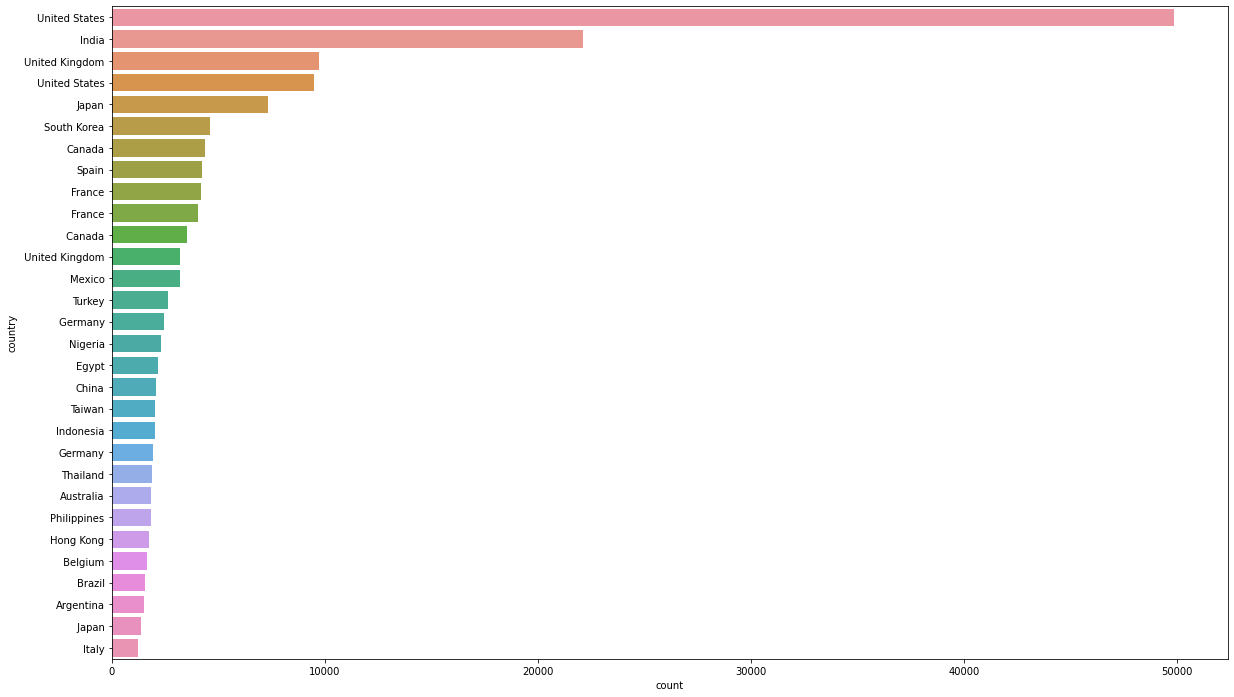

In [ ]:
#countplot for country

plt.figure(figsize=(20,12))
ax = sns.countplot(y="country", data=netflix_df,  order=netflix_df['country'].value_counts().index[0:30])

This graph shows which country has the most of the content?. We can observe that united states and india has the most of the content.

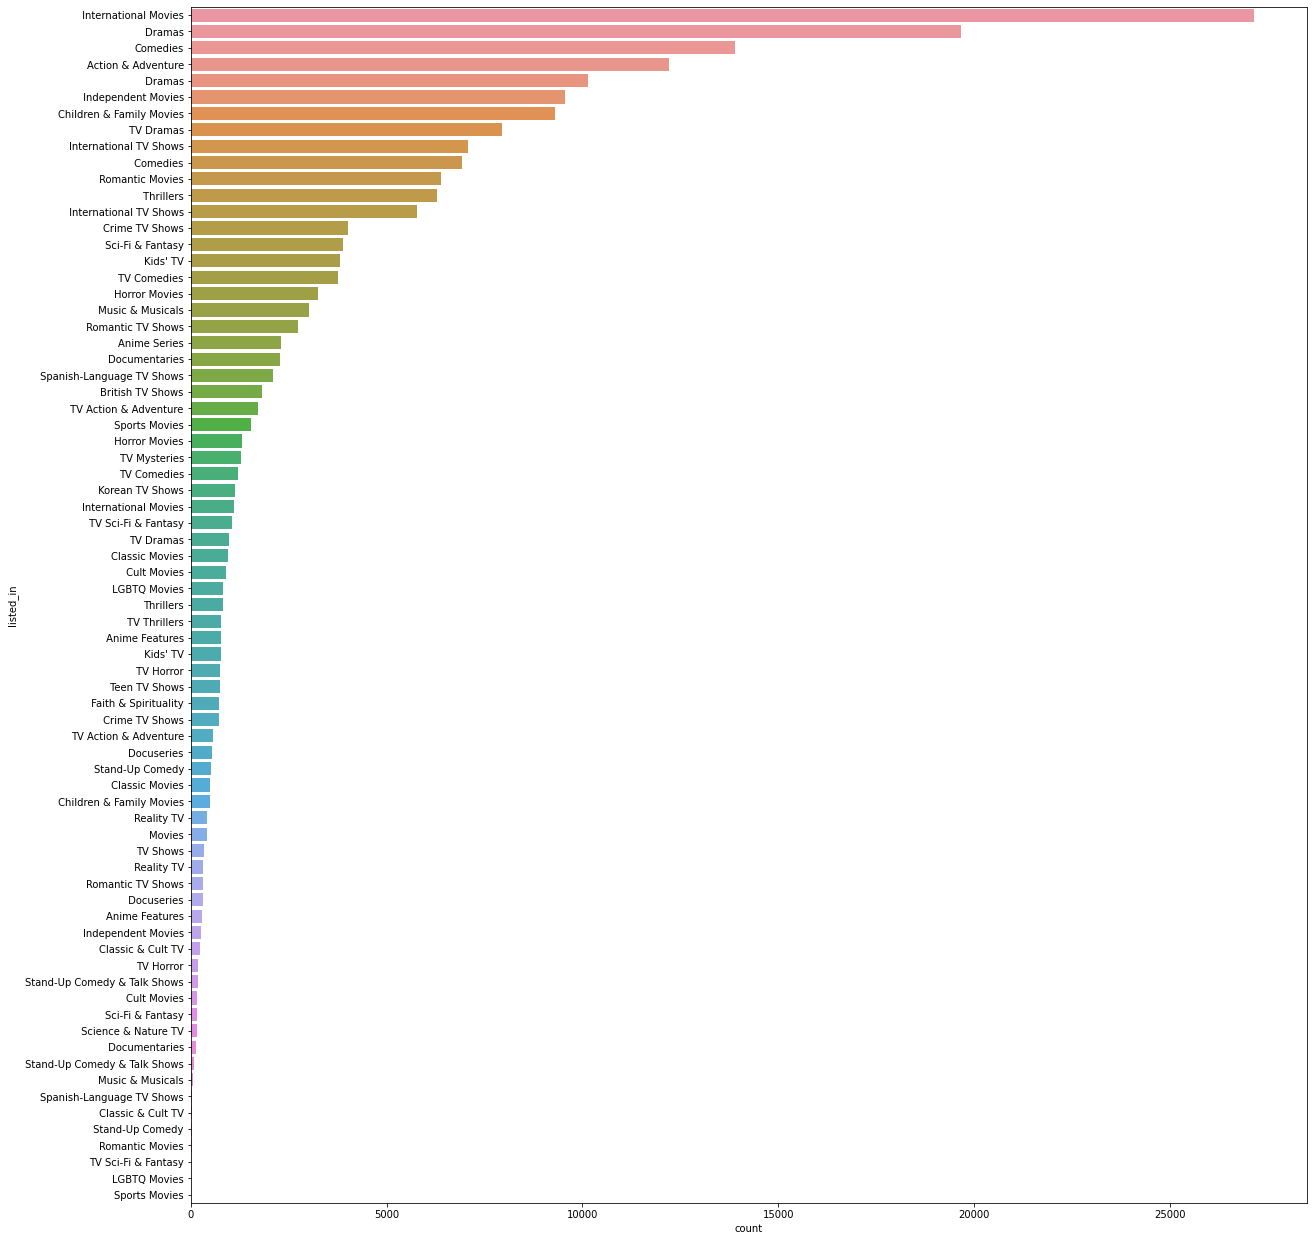

In [ ]:
#countplot for listed_in

plt.figure(figsize=(20,22))
ax = sns.countplot(y="listed_in", data=netflix_df,  order=netflix_df['listed_in'].value_counts().index[0:])

This graph shows which genre is most produced?. We can observe that international movies and dramas are most produced.

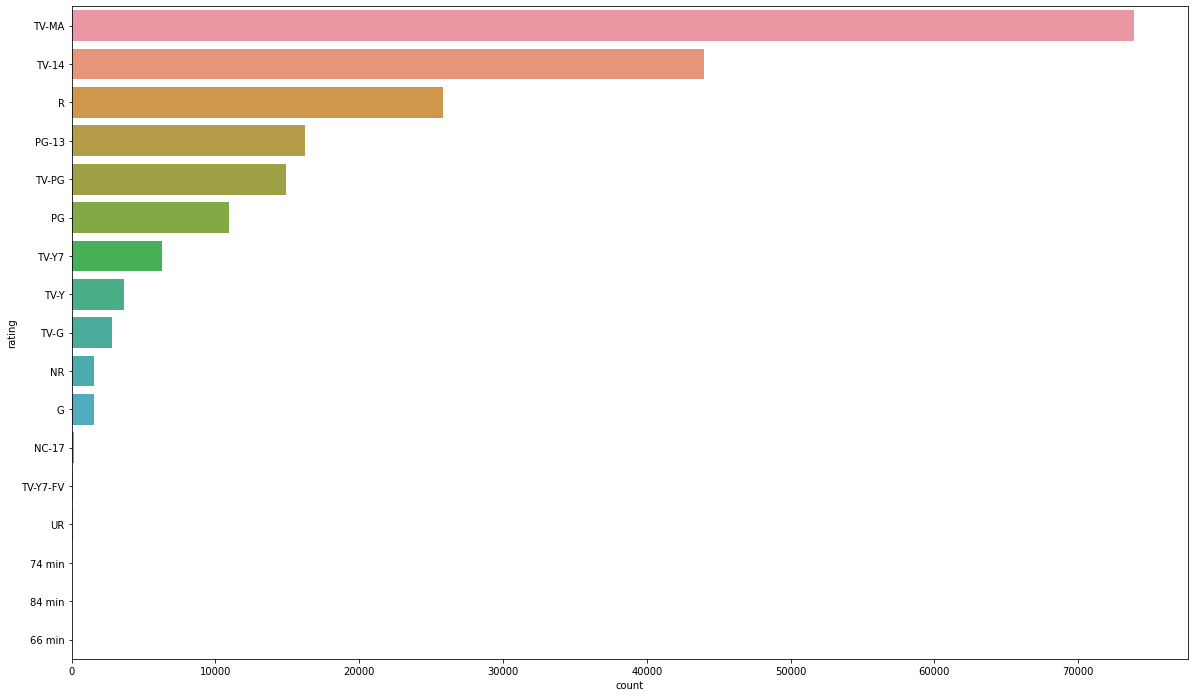

In [ ]:
#countplot for rating

plt.figure(figsize=(20,12))
ax = sns.countplot(y="rating", data=netflix_df,  order=netflix_df['rating'].value_counts().index[0:])

This plot shows the count of each category in rating. TV-MA has the most number of movies and tv shows.

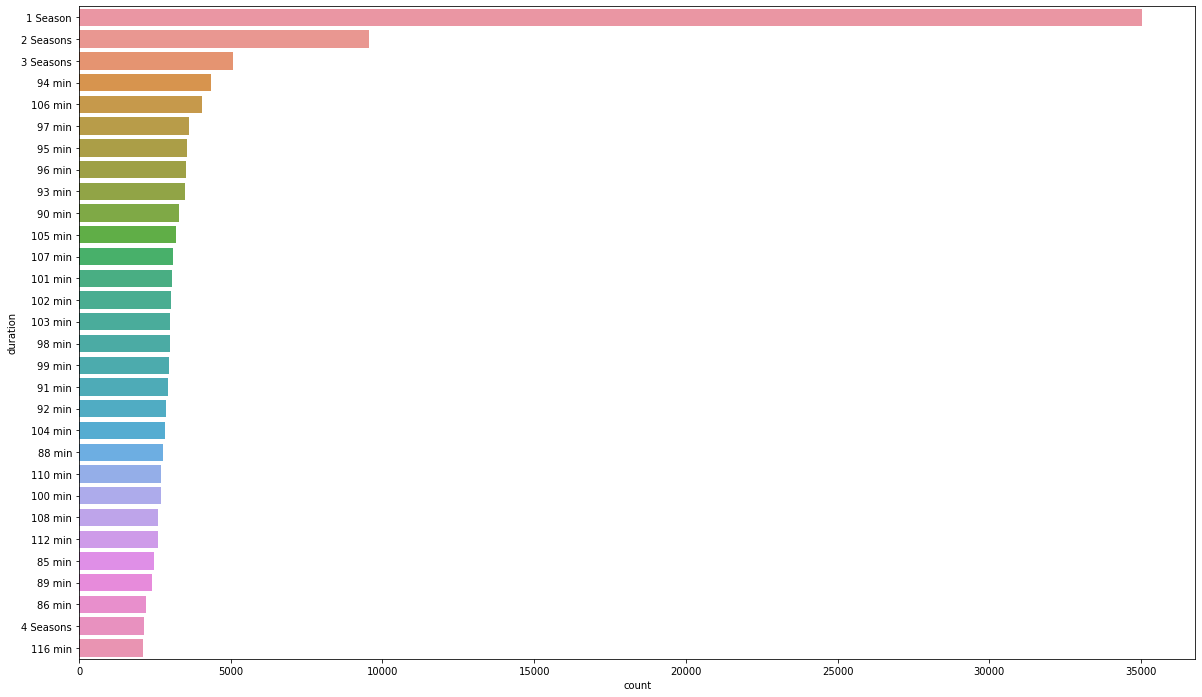

In [ ]:
#countplot for duration

plt.figure(figsize=(20,12))
ax = sns.countplot(y="duration", data=netflix_df,  order=netflix_df['duration'].value_counts().index[0:30])

This graph shows the duration of movies and tv shows. We can observe that most of the tv shows has 1 season and most of the movies has 94 min duration.

**ii. Bivariate analysis**

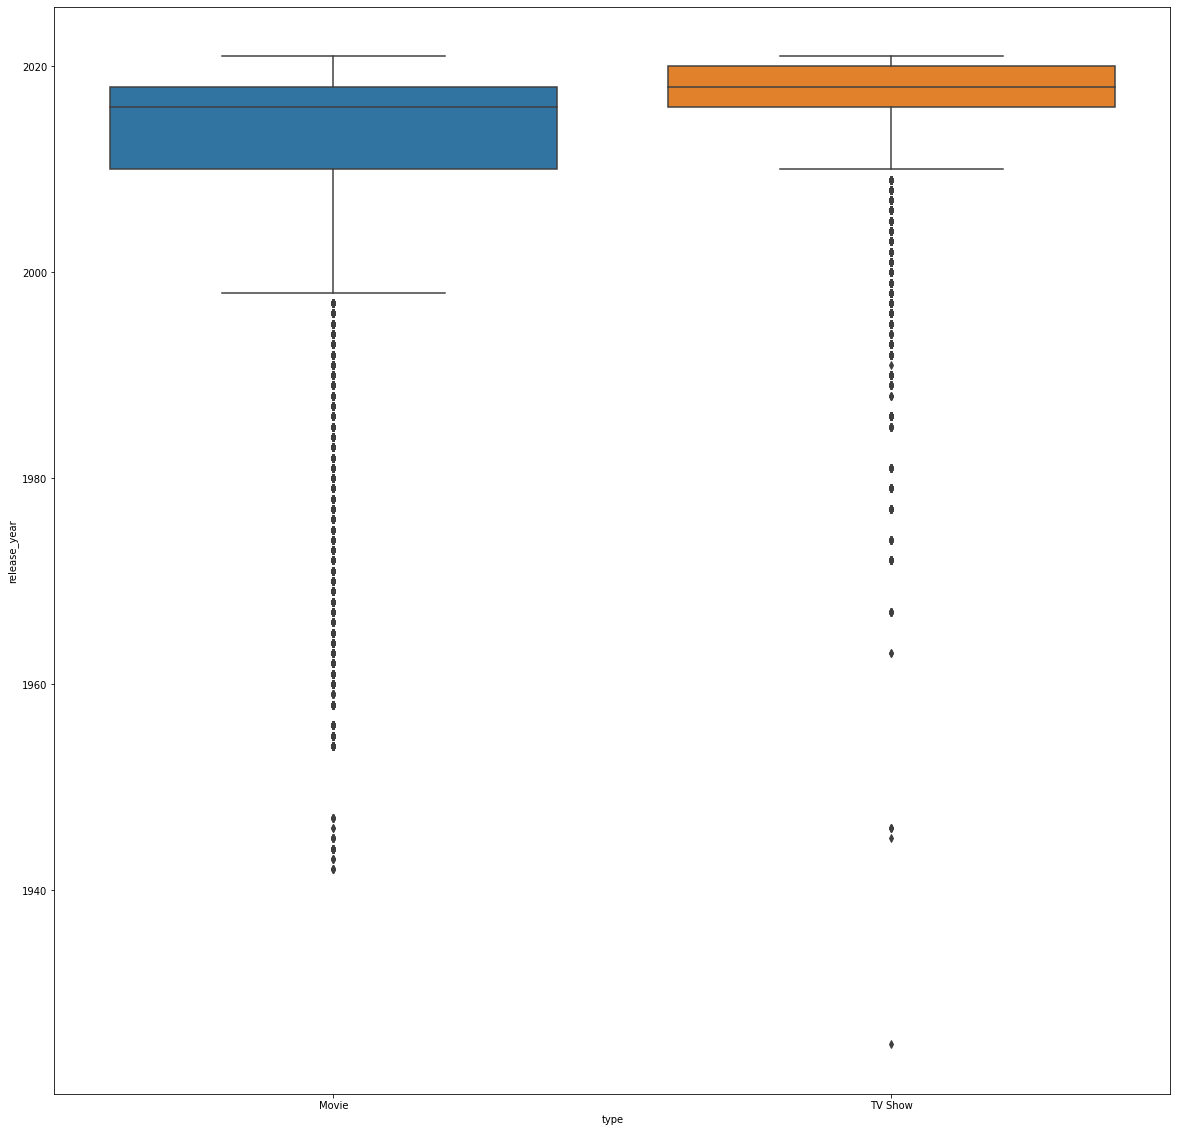

In [ ]:
#Boxplot for type and release year

plt.figure(figsize=(20,20))
sns.boxplot(x=netflix_df["type"],y=netflix_df["release_year"])
plt.show()

**Treating Missing Value**

In [ ]:
#Replaceing null values of director column with unknown

netflix_df.director.fillna(value = "Unknown",inplace = True)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
#Replaceing null values of cast column with unknown

netflix_df.cast.fillna(value = "Unknown",inplace = True)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
#Replaceing null values of country column with unknown

netflix_df.country.fillna(value = "Unknown",inplace = True)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
#Replaceing null values of date_added column with unknown

netflix_df.date_added.fillna(value = "Unknown",inplace = True)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
#Replaceing null values of duration column with unknown

netflix_df.duration.fillna(value = netflix_df.rating,inplace = True)
netflix_df.loc[(netflix_df["rating"] == "74 min") | (netflix_df["rating"] == "84 min") | (netflix_df["rating"] == "66 min")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
126582,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
131648,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
#Replacing the wrong rating values with null

netflix_df["rating"] = netflix_df["rating"].replace("74 min",np.nan)
netflix_df["rating"] = netflix_df["rating"].replace("84 min",np.nan)
netflix_df["rating"] = netflix_df["rating"].replace("66 min",np.nan)

In [ ]:
netflix_df["rating"].value_counts()

TV-MA       73915
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

In [ ]:
#checking if the values got replaced with null 

netflix_df.isnull().sum().reset_index()

,index,0
0,show_id,0
1,type,0
2,title,0
3,director,0
4,cast,0
5,country,0
6,date_added,0
7,release_year,0
8,rating,70
9,duration,0


In [ ]:
#Replacing null values in rating column with the values frequent based on the listed_in

netflix_df["rating"] = netflix_df.groupby("listed_in")["rating"].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [ ]:
netflix_df.isnull().sum().reset_index()

,index,0
0,show_id,0
1,type,0
2,title,0
3,director,0
4,cast,0
5,country,0
6,date_added,0
7,release_year,0
8,rating,0
9,duration,0


In [ ]:
netflix_df["rating"].value_counts()

TV-MA       73973
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6316
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

**Observations after treating null values**

In [ ]:
netflix_df.shape

(202065, 12)

In [ ]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We can observe now no null values are present

In [ ]:
netflix_df.describe()

,release_year
count,202065.000000
mean,2013.448950
std,9.013616
min,1925.000000
25%,2012.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [ ]:
netflix_df.describe(include="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,202065,202065,202065,202065,202065,202065,202065,202065,202065,202065,202065
unique,8807,2,8807,5121,39297,198,1768,14,220,73,8775
top,s7165,Movie,Kahlil Gibran's The Prophet,Unknown,Unknown,United States,"January 1, 2020",TV-MA,1 Season,International Movies,A troubled young girl and her mother find sola...
freq,700,145917,700,50643,2149,49868,3730,73973,35035,27141,700


Non-Graphical Analysis after treating null values

In [ ]:
netflix_df["type"].value_counts()

Movie      145917
TV Show     56148
Name: type, dtype: int64

There are only two categories in type column they are movie and tv show. We can observe there are more movies than tv show.

In [ ]:
netflix_df["director"].value_counts()

Unknown                50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
 Reuben Atlas              1
Max Amini                  1
Bassam Tariq               1
Paul Miller                1
Kirsten Johnson            1
Name: director, Length: 5121, dtype: int64

We can see how many movies and tv shows each director has directed. We can also observe there are many unknown directors which we treat it as seperate category.

In [ ]:
netflix_df["cast"].value_counts()

Unknown                  2149
 Alfred Molina            160
 Salma Hayek              130
 Frank Langella           128
 John Rhys-Davies         125
                         ... 
 Cle Sloan                  1
 George Konner              1
 Andy Hayward               1
 Lyric Lewis                1
 Trent 'Maxi' Maxwell       1
Name: cast, Length: 39297, dtype: int64

Here we can see in how many movies and tv showns an actor has acted in. We can also observe there are many unknown cast which we treat it as seperate category.

In [ ]:
netflix_df["country"].value_counts()

United States     49868
India             22139
Unknown           11897
United Kingdom     9733
 United States     9482
                  ...  
 Samoa                2
 Sri Lanka            2
 Kazakhstan           1
 Uganda               1
 Nicaragua            1
Name: country, Length: 198, dtype: int64

We can see that highest number of movies or tv shows are produced from united states and india. There are many movies or tv shows which we don't have the country we can treat them as seperate category.

In [ ]:
netflix_df["rating"].value_counts()

TV-MA       73973
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6316
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

Here we can see in each category of rating how many movies and tv shows are present?. We can clearly observe TV-MA category has maximum movies and tv shows.

In [ ]:
netflix_df["listed_in"].value_counts()

 International Movies    27141
Dramas                   19657
Comedies                 13894
Action & Adventure       12216
 Dramas                  10149
                         ...  
 Stand-Up Comedy            24
Romantic Movies             20
TV Sci-Fi & Fantasy          7
LGBTQ Movies                 5
Sports Movies                3
Name: listed_in, Length: 73, dtype: int64

Here we can see how many movies and tv shows in each genre?. International Movies has maximum number of tv shows and movies.

**Visual Analysis after treating null values**

**i. Univariate analysis**

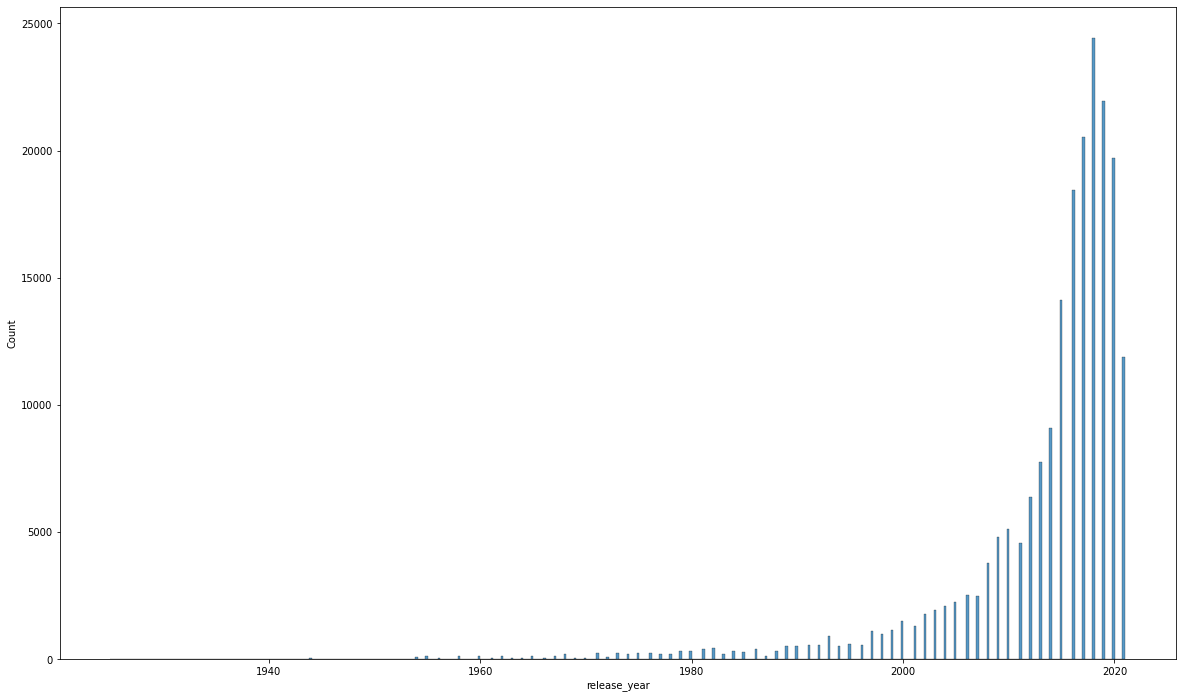

In [ ]:
#Histogram for release_year

plt.figure(figsize=(20,12))
sns.histplot(netflix_df["release_year"])
plt.show()

Here we can observe that from the year 1960 number of movies and tv shows produced has increased exponentially. From year 2012 number of movies and tv shows produced has increased every year. One of the reasons is maybe availability of internet and smart phones.

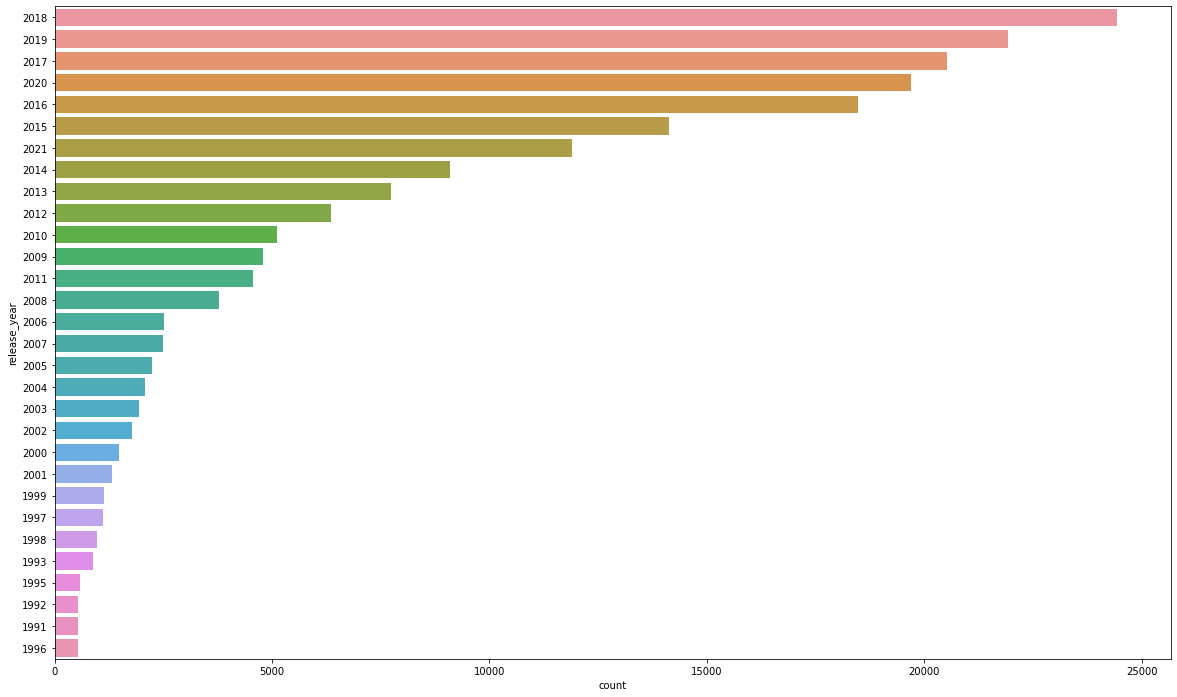

In [ ]:
#countplot for release_year

plt.figure(figsize=(20,12))
ax = sns.countplot(y="release_year", data=netflix_df,  order=netflix_df['release_year'].value_counts().index[0:30])

This graph shows that the majority of the content was created in 2018. The amount of produced contents is minimal in 2019, 2020, and 2021, which is an interesting fact. This is primarily because to the Covid-19 epidemic.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


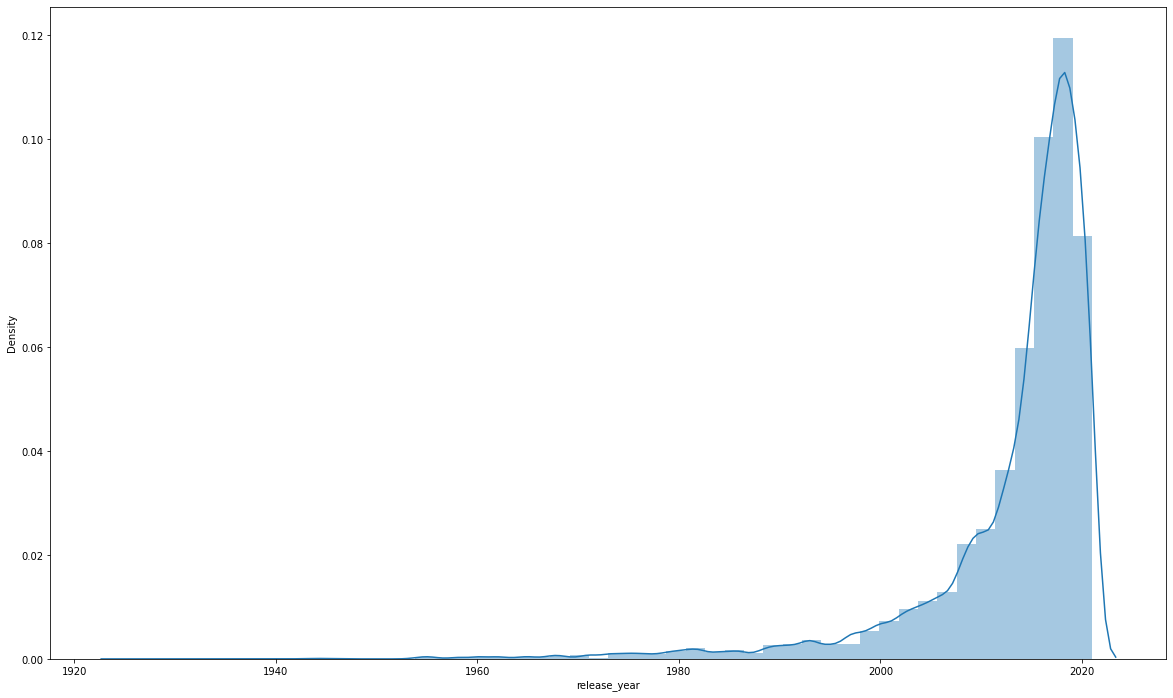

In [ ]:
#Distplot for release_year

plt.figure(figsize=(20,12))
sns.distplot(netflix_df["release_year"])
plt.show()

This graph shows the maximum distribution of data is after year 2000.

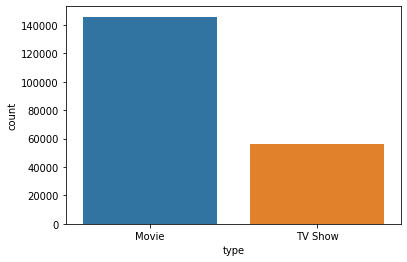

In [ ]:
#countplot for type

sns.countplot(x="type", data=netflix_df)
plt.show()

This plot shows the count of movies and tv shows after treating the null values. Number of movies produced are more compared to tv shows.

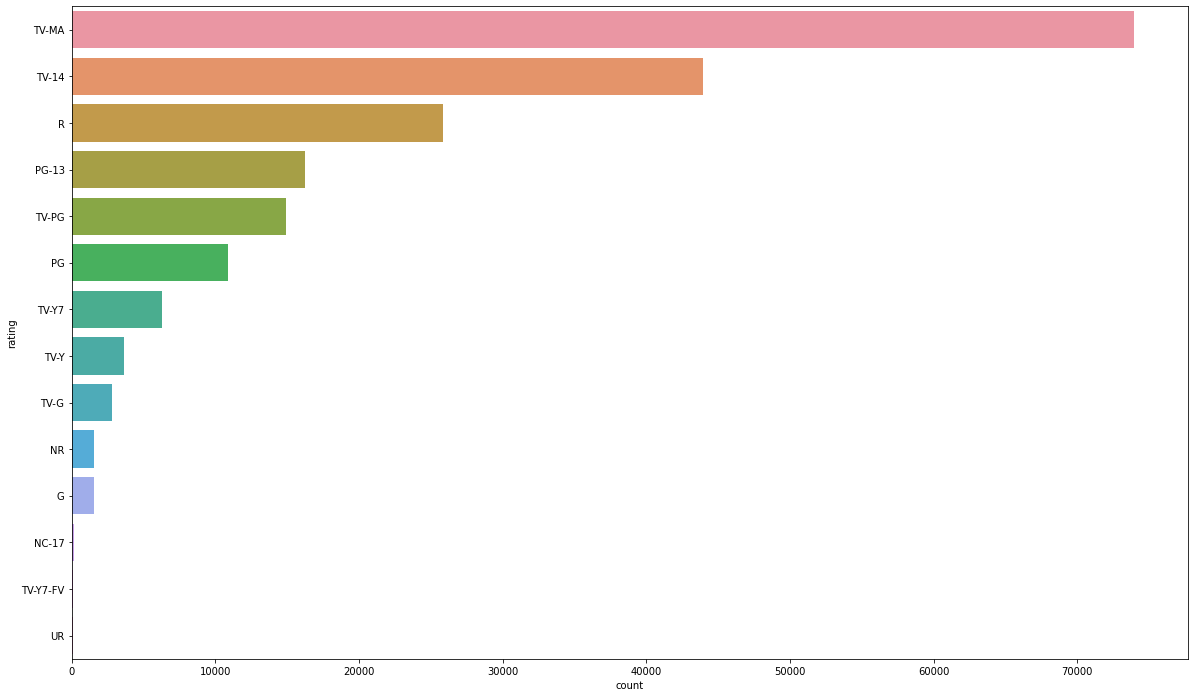

In [ ]:
#countplot for rating

plt.figure(figsize=(20,12))
ax = sns.countplot(y="rating", data=netflix_df,  order=netflix_df['rating'].value_counts().index[0:])

This plot shows the count of each category in rating. TV-MA has the most number of movies and tv shows.

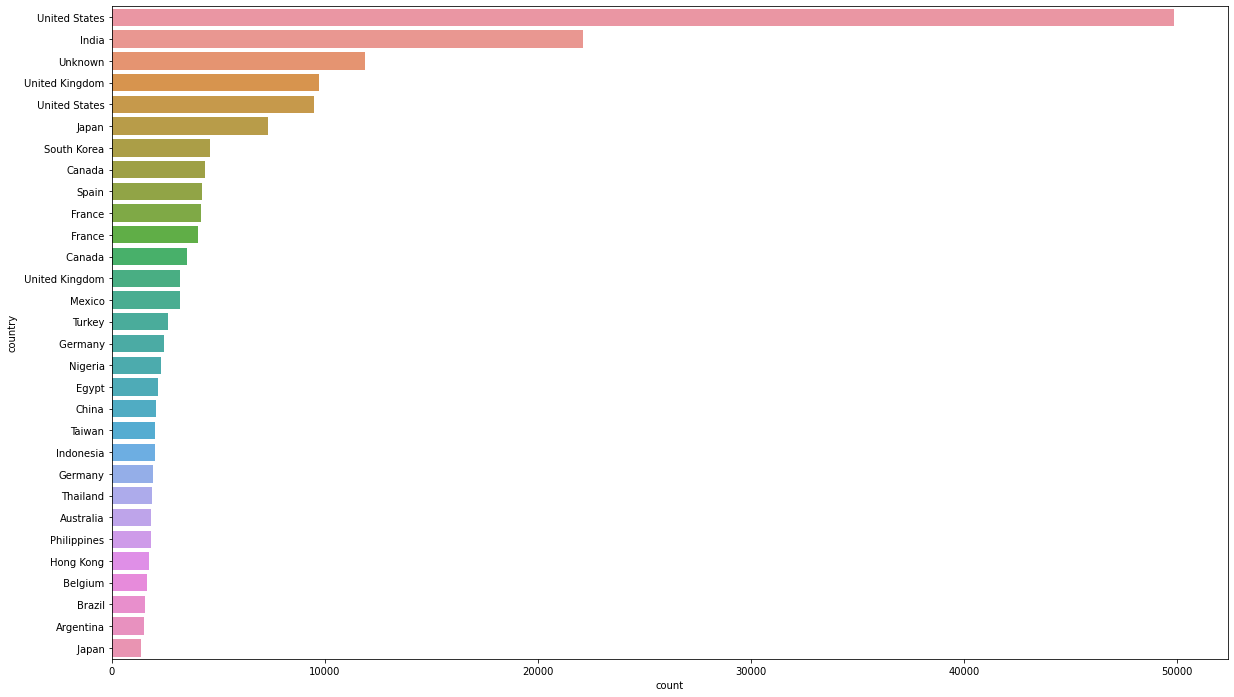

In [ ]:
#countplot for country

plt.figure(figsize=(20,12))
ax = sns.countplot(y="country", data=netflix_df,  order=netflix_df['country'].value_counts().index[0:30])

This graph shows which country has the most of the content?. We can observe that united states and india has the most of the content.

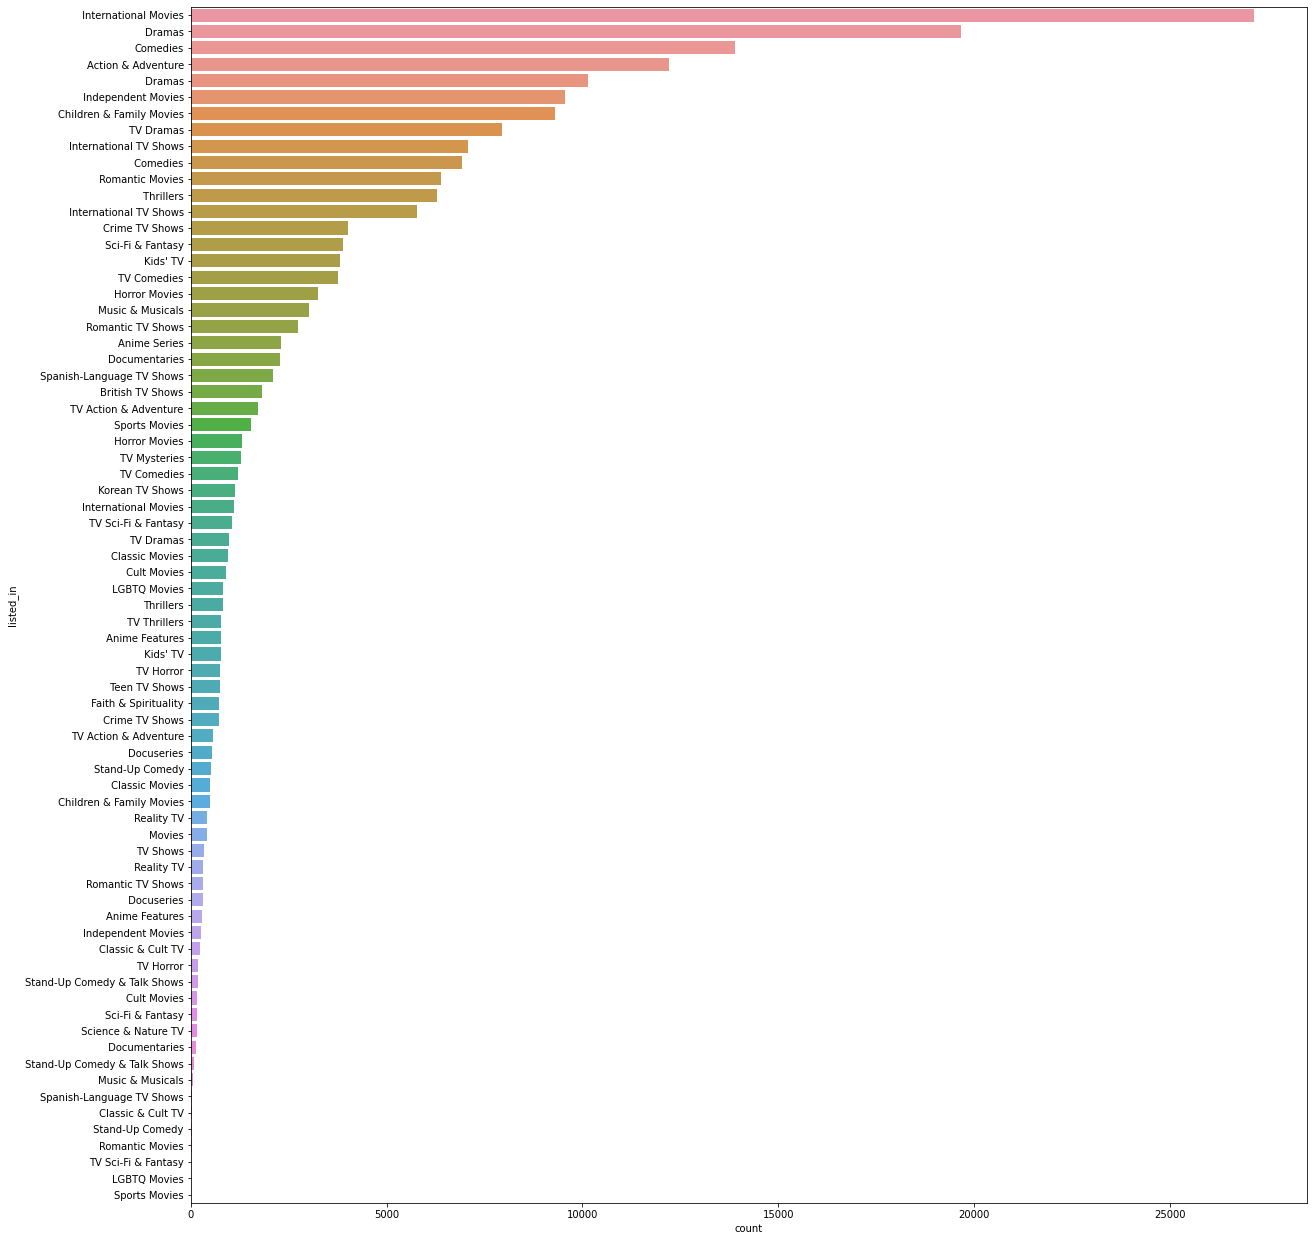

In [ ]:
#countplot for listed_in

plt.figure(figsize=(20,22))
ax = sns.countplot(y="listed_in", data=netflix_df,  order=netflix_df['listed_in'].value_counts().index[0:])

This graph shows which genre is most produced?. We can observe that international movies and dramas are most produced.

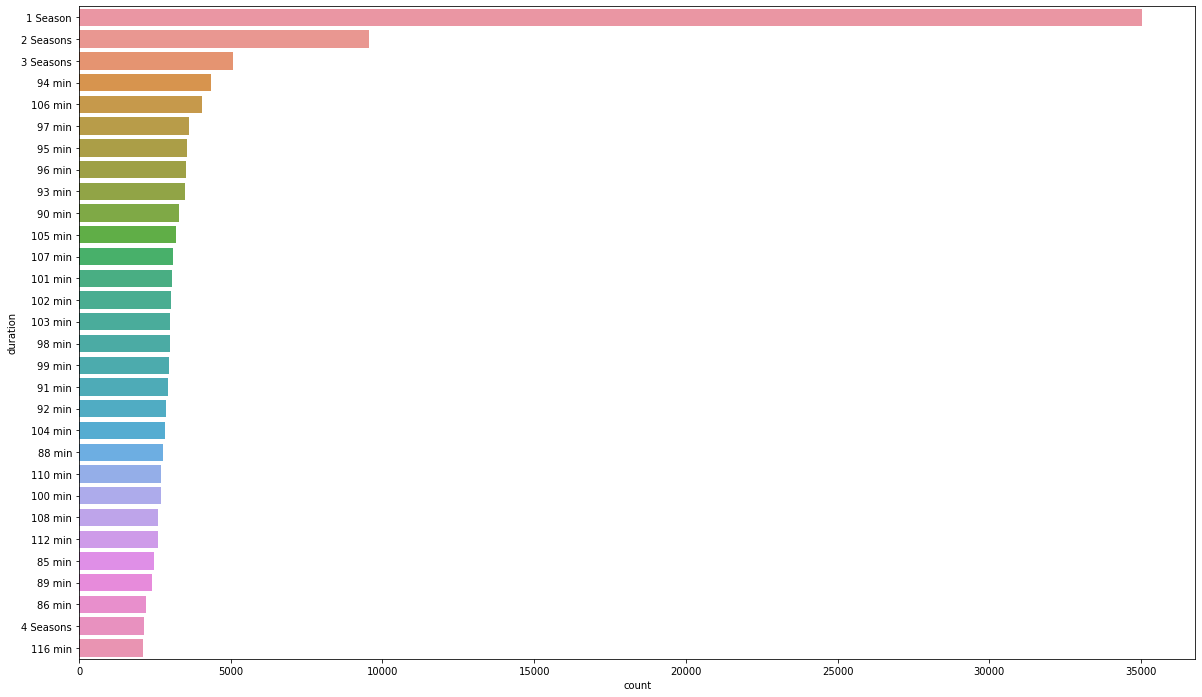

In [ ]:
#countplot for duration

plt.figure(figsize=(20,12))
ax = sns.countplot(y="duration", data=netflix_df,  order=netflix_df['duration'].value_counts().index[0:30])

This graph shows the duration of movies and tv shows. We can observe that most of the tv shows has 1 season and most of the movies has 94 min duration.

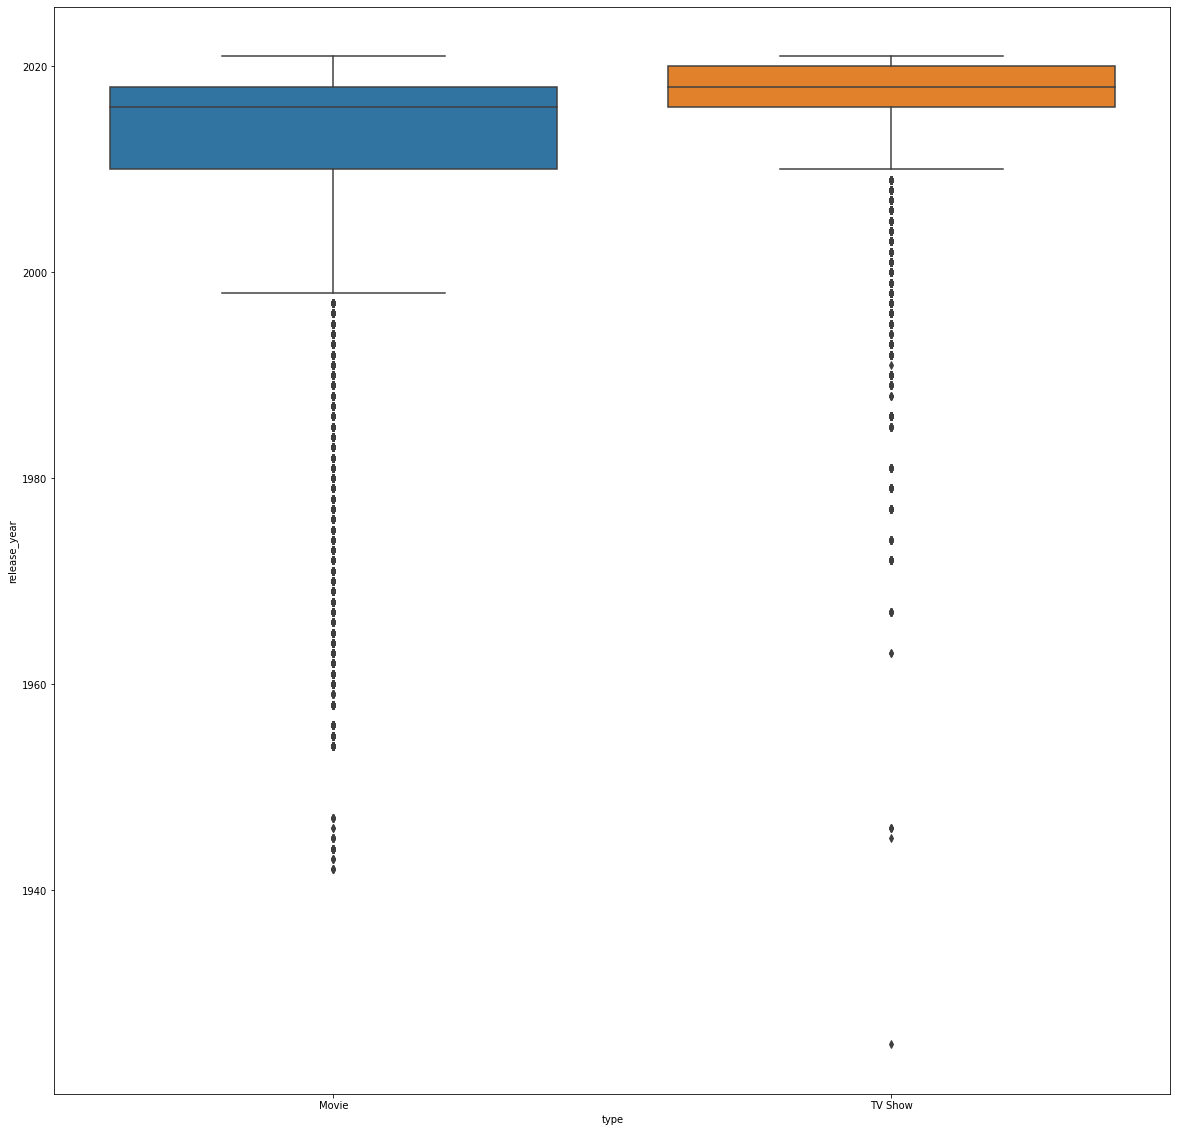

In [ ]:
#Boxplot for type and release year

plt.figure(figsize=(20,20))
sns.boxplot(x=netflix_df["type"],y=netflix_df["release_year"])
plt.show()

**Business Insights**

What type of content is available in different countries?

In [ ]:
type_cou = netflix_df.groupby("country")["type"].value_counts().to_frame("counts").reset_index()
type_cou

,country,type,counts
0,,Movie,98
1,,TV Show,8
2,Afghanistan,Movie,2
3,Albania,Movie,8
4,Algeria,Movie,77
...,...,...,...
286,Uruguay,TV Show,3
287,Venezuela,Movie,4
288,Vietnam,Movie,134
289,West Germany,Movie,4


Comparison of tv shows vs. movies

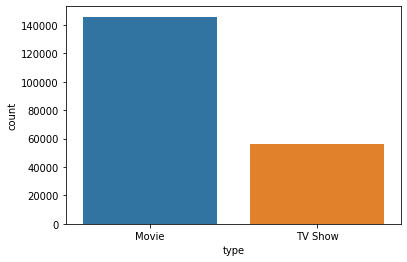

In [ ]:
sns.countplot(x="type", data=netflix_df)
plt.show()

Netflix has more movies than tv shows. So, netflix is focusing more on movies.

In [ ]:
#What type of content released in a year?

type_con = netflix_df.groupby("release_year")["type"].value_counts().to_frame("counts").reset_index()
type_con

,release_year,type,counts
0,1925,TV Show,1
1,1942,Movie,6
2,1943,Movie,5
3,1944,Movie,24
4,1945,Movie,12
...,...,...,...
114,2019,TV Show,10005
115,2020,TV Show,10089
116,2020,Movie,9608
117,2021,TV Show,6467


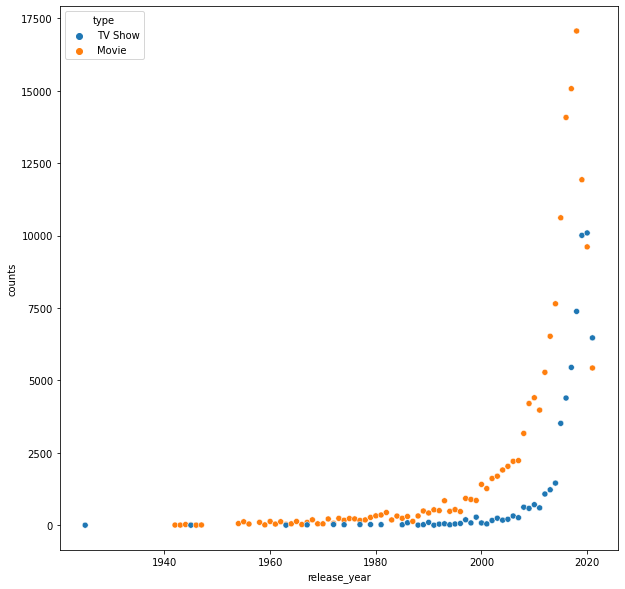

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = "release_year",y = "counts", hue = "type", data=  type_con)
plt.show()

Number of movies and tv shows produced has significantly increased after 2016.

In which year does Netflix have a jump in the number of releases?

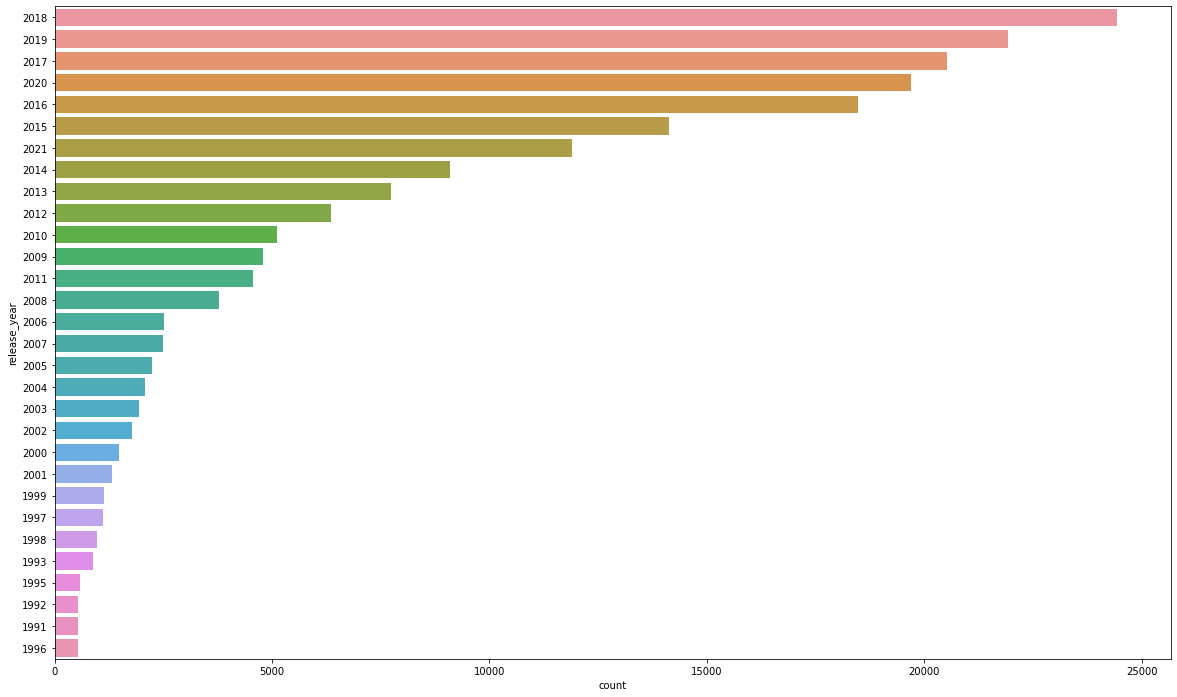

In [ ]:
plt.figure(figsize=(20,12))
ax = sns.countplot(y="release_year", data=netflix_df,  order=netflix_df['release_year'].value_counts().index[0:30])

Graph shows in 2018 netflix has jump in the number of releases

Which country has the most Netflix movies or shows?

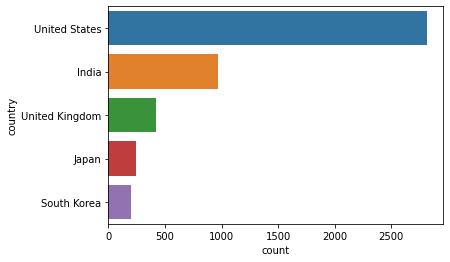

In [ ]:
ax = sns.countplot(y="country", data=netflix_df,  order=netflix_df['country'].value_counts().index[0:5])

Graph shows netflix has most of the content from united states.

Top 10 directors who have the most movies released on netflix

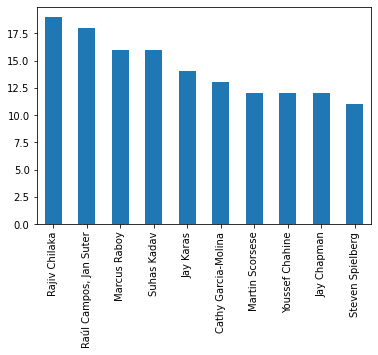

In [ ]:
netflix_df.explode("director")["director"].value_counts()[:10].plot(kind="bar")
plt.show()

Rajiv Chilaka has the most number of movies in netflix

**Recommendations**

1) Netflix has more number of movies than tv shows. So, netflix has to focus more on tv shows also.

2) Most of the tv shows has only 1 season. So, Netflix should put more effort into generating sequels for those television shows.

3) In netflix most of the content is international movies. So, netflix has to make content in other genre also.